In [31]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [33]:

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [34]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


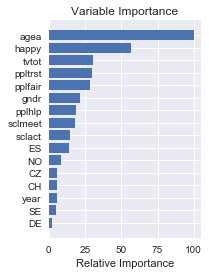

In [35]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

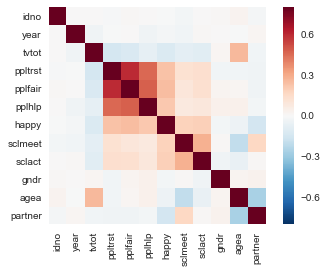

In [36]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

### DRILL: Improve this gradient boost model
While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:
1. Creating new features
2. Applying more overfitting-prevention strategies like subsampling
3. More iterations
4. Trying a different loss function
5. Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications
Have fun!

In [37]:
# increasing the iterations to 20000, use 2-deep trees, and set our loss function.
params = {'n_estimators': 20000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.033278777959629025
Percent Type II errors: 0.11974904528096017

Test set accuracy:
Percent Type I errors: 0.1116564417177914
Percent Type II errors: 0.17423312883435582


In [39]:
#combining the correlated features

means = X[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = X[['ppltrst','pplfair','pplhlp']].std(axis=0)
X_New_Features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

X_New_Features = X_New_Features.drop(['ppltrst','pplfair','pplhlp'],axis=1)
X_New_Features['age_squared'] = X_New_Features['agea'] * X_New_Features['agea']
# Create training and test sets.
offset = int(X_New_Features.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train_nf, y_train = X_New_Features[:offset], y[:offset]

# And put 10% in the test set.
X_test_nf, y_test = X_New_Features[offset:], y[offset:]


In [40]:
# increasing the iterations to 20000, use 2-deep trees, and set our loss function.
params = {'n_estimators': 20000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_nf, y_train)

predict_train = clf.predict(X_train_nf)
predict_test = clf.predict(X_test_nf)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.02618657937806874
Percent Type II errors: 0.09997272231314784

Test set accuracy:
Percent Type I errors: 0.0736196319018405
Percent Type II errors: 0.19754601226993865


In [44]:
X_New_Features.head()

,year,tvtot,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE,trust_fair_help,age_squared
0,6,3.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0,0.191246,3600.0
1,6,6.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0,0.020453,3481.0
2,6,1.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0,1.090626,576.0
3,6,4.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0,0.321425,4096.0
4,6,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0,0.170892,3025.0


In [47]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=10)
features_sklearn = sklearn_pca.fit_transform(X_New_Features)

# Put 90% of the data in the training set.
X_train_pca, y_train = features_sklearn[:offset], y[:offset]

# And put 10% in the test set.
X_test_pca, y_test = features_sklearn[offset:], y[offset:]

clf.fit(X_train_pca, y_train)

predict_train = clf.predict(X_train_pca)
predict_test = clf.predict(X_test_pca)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.16441717791411042
Percent Type II errors: 0.1705521472392638


### PCA seems to result in perfect prediction of the training set but poor prediction of the test set (overfitting)?

In [49]:
# increasing the iterations to 20000, use 2-deep trees, and set our loss function.
params = {'n_estimators': 10000,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_nf, y_train)

predict_train = clf.predict(X_train_nf)
predict_test = clf.predict(X_test_nf)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.10306748466257669
Percent Type II errors: 0.17791411042944785


In [70]:


## age was influential - what if I made it categorical and then made a dummy feature set?
X_nf_age=X_New_Features.drop(['agea'],axis=1)
X_nf_age['60_Plus'] = np.where(X_New_Features['agea']>=60, 1, 0)


 # Put 90% of the data in the training set.
X_train_nf_age, y_train = X_nf_age[:offset], y[:offset]

# And put 10% in the test set.
X_test_nf_age, y_test = X_nf_age[offset:], y[offset:]
# increasing the iterations to 20000, use 2-deep trees, and set our loss function.
params = {'n_estimators': 5000,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample': 1.0}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_nf_age, y_train)

predict_train = clf.predict(X_train_nf_age)
predict_test = clf.predict(X_test_nf_age)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.03723404255319149
Percent Type II errors: 0.1362520458265139

Test set accuracy:
Percent Type I errors: 0.08711656441717791
Percent Type II errors: 0.17177914110429449
